# Sense Hat 1

In this documentation, we will go over loading the data, analyzing the data, building a fault early detection model, and machine state identification model using Gaussian Mixture Model.    

### Load data and analyze data


In [2]:
#install.packages(c("mclust", "anytime", "lubridate", "caret","imputeTS", "caret","mlbench"))


Installing packages into ‘/srv/rlibs’
(as ‘lib’ is unspecified)


In [2]:
#load all the libraries
library(mclust)
#library(e1071)
#library(randomForest)
library(anytime) #used for formatting date
library(lubridate) #used for formatting date
library(imputeTS)
library(caret)
library(mlbench)
#library(qcc)
#library(dplyr)
#library(mdatools)
#library(parallelDist)

#set random seed value
set.seed(999)


In [3]:
#load data
#data = read.csv("C:/Users/Gupta/Google Drive/sensehat 1/senseHatOneFeatureData.csv", header=T)
id <- "13WwzrLZj-iOfQl128mJV7DDYQY_VaOIF"
data <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))

data  = data[1000:nrow(data),]

tail(data)

,timeStamp,Temperature,Pressure,Humidity,mean,sd,median,trimmed,mad,min,⋯,sd.5,median.5,trimmed.5,mad.5,min.5,max.5,range.5,skew.5,kurtosis.5,se.5
20570,2019-01-14 21:38:17,43.55885,993.6777,12.33072,-0.05782268,0.02304876,-0.05692931,-0.05738967,0.01859736,-0.1225428,⋯,0.4310810,0.7057850,0.7295240,0.4097445,0.013760471,2.824393,2.810633,0.9585329,1.4352428,0.01502654
20571,2019-01-14 21:39:17,43.62962,993.6660,11.17705,-0.05811935,0.02323347,-0.05692931,-0.05751494,0.01931264,-0.1230252,⋯,0.4270114,0.6955219,0.7258382,0.3881569,0.019882111,3.559269,3.539387,1.2401605,3.5679262,0.01488468
20572,2019-01-14 21:40:17,43.47038,993.6685,12.91744,-0.05576868,0.02261007,-0.05427583,-0.05491130,0.01752443,-0.1218191,⋯,0.4225272,0.7414121,0.7432841,0.3945596,0.006661583,3.938227,3.931566,1.2072430,4.1243487,0.01472837
20573,2019-01-14 21:41:17,43.52346,993.6282,12.00769,-0.05673197,0.02225978,-0.05668809,-0.05647772,0.01680915,-0.1230252,⋯,0.4263423,0.6993867,0.7376875,0.4290602,0.021762135,2.656238,2.634476,0.7779144,0.6963424,0.01486136
20574,2019-01-14 21:42:17,43.57654,993.6365,12.27139,-0.05731390,0.02228553,-0.05692931,-0.05680057,0.01716679,-0.1232664,⋯,0.4199319,0.6893746,0.7214792,0.4095977,0.041259447,3.781904,3.740645,1.1378483,3.5471980,0.01463790
20575,2019-01-14 21:43:17,43.59423,993.6174,12.43949,-0.05689017,0.02176905,-0.05668809,-0.05655734,0.01645151,-0.1232664,⋯,0.4122759,0.6833848,0.7057763,0.3897274,0.019159830,2.924910,2.905750,1.0376342,2.4863308,0.01437103


In [4]:
str(data)

'data.frame':	19576 obs. of  70 variables:
 $ timeStamp  : Factor w/ 20575 levels "11/27/2018 17:13",..: 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 ...
 $ Temperature: num  45.1 45.1 45.1 45.1 45.1 ...
 $ Pressure   : num  989 989 989 989 989 ...
 $ Humidity   : num  11.8 11.9 10.9 11.8 11.7 ...
 $ mean       : num  -0.0225 -0.0225 -0.0226 -0.0225 -0.0227 ...
 $ sd         : num  0.001064 0.001302 0.00098 0.000764 0.005274 ...
 $ median     : num  -0.0224 -0.0224 -0.0227 -0.0224 -0.0224 ...
 $ trimmed    : num  -0.0225 -0.0225 -0.0226 -0.0225 -0.0226 ...
 $ mad        : num  0.001073 0.001073 0.000715 0.000715 0.001431 ...
 $ min        : num  -0.0275 -0.0343 -0.0275 -0.0251 -0.1112 ...
 $ max        : num  -0.0176 -0.0142 -0.0186 -0.02 0.0549 ...
 $ range      : num  0.00989 0.02002 0.00893 0.00507 0.16608 ...
 $ skew       : num  0.1094 -0.1515 0.1137 0.0444 -0.4641 ...
 $ kurtosis   : num  1.09247 12.14309 1.43645 0.00098 99.07143 ...
 $ se         : num  2.62e-05 3.21e-05 2.

#### Plot raw data

In [5]:
data$timeStamp = anytime(data$timeStamp)
#tail(data$timeStamp, 1000)

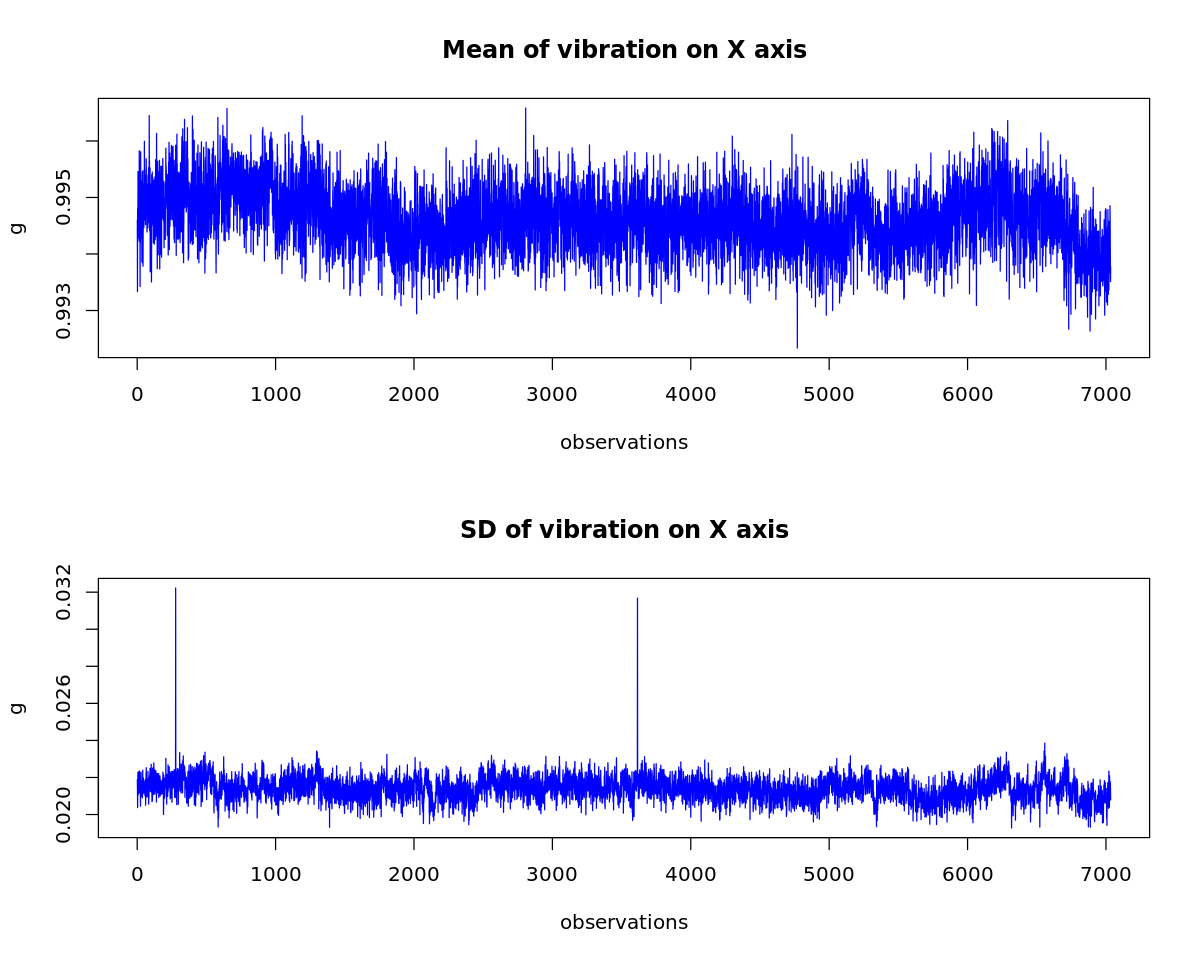

In [6]:
options(repr.plot.width = 10, repr.plot.height = 8)

data$timeStamp = anytime(data$timeStamp)
dat = subset.data.frame(data, timeStamp >= Sys.Date()-5)
par(mfrow=c(2,1))
plot(dat$mean.4, 
     type="l", 
     col="blue", 
     main="Mean of vibration on X axis",
     ylab="g",
     xlab="observations")
plot(dat$sd.4, 
     type="l", 
     col="blue", 
     main="SD of vibration on X axis",
     ylab="g",
     xlab="observations")

#### Summarize Data

Data need to be analyzed as the first step to see distributions in data, any outliers and uniqeness in the data. This step will give us the initial picture of the data.

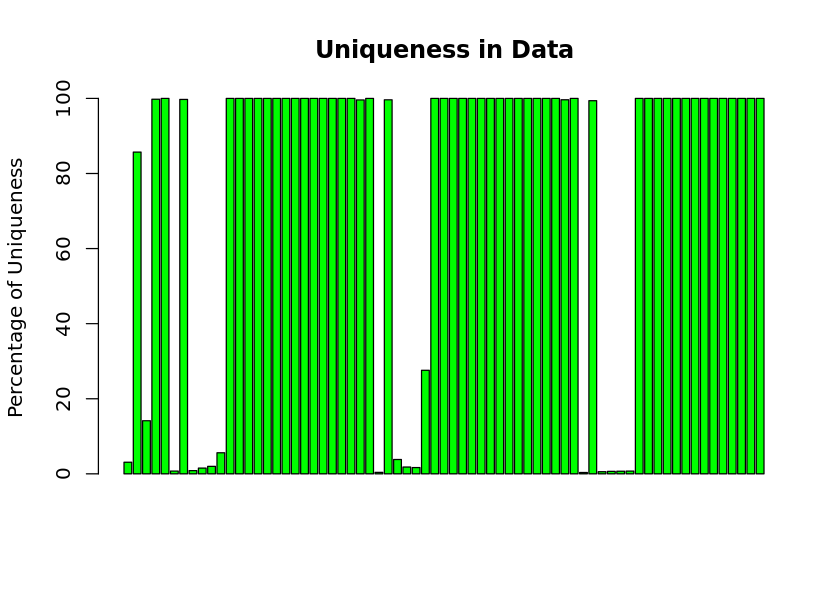

In [7]:
#create new dataframe without date
data.1 = data.frame(data[,2:ncol(data)])

#convert any NA's with mean values using imputeTS package
data.1 = na.mean(data.1)

#looking at data uniqueness
uniqueness = NULL
for(i in 1:ncol(data.1)){
  a = data.frame(percent = length(unique(data.1[,i]))/length(data.1[,i]))
  uniqueness = rbind.data.frame(uniqueness, a )
}

a = as.matrix(t(uniqueness))
options(repr.plot.width = 7, repr.plot.height = 5)
barplot(a*100, 
        main="Uniqueness in Data", 
        col=ifelse(a > 0.2,"red","green"),
        ylab="Percentage of Uniqueness")

In the above plot we can notice that most of the data we have is unique and that is good for analysis. Hence, we will see variance in the data.

In [8]:
uniques = data.frame(features = as.character(colnames(data.1)),
           unique = uniqueness)
uniqueFeatures = subset.data.frame(uniques,
                                   percent > 0.3)
#cols = as.character(uniqueFeatures$features)
uniqueFeatures.1 = subset(data.1, 
                          select = uniqueFeatures$features)

#### Box plots
Next, we need to look at data distributions. one way to do it is to use boxplots

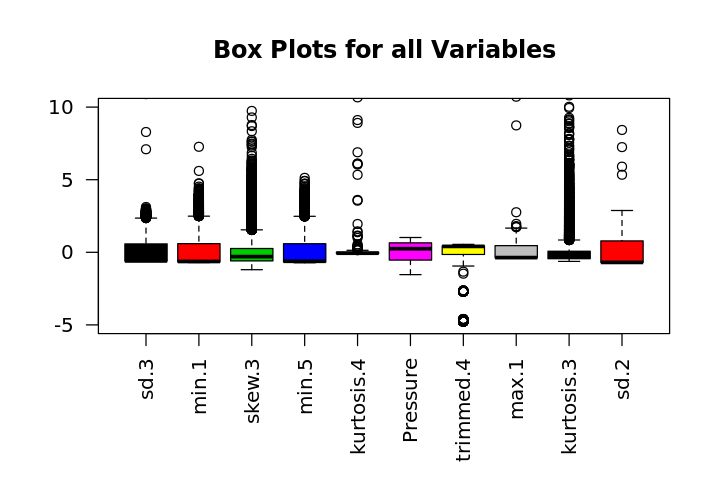

In [9]:
scale.data.1 = scale(uniqueFeatures.1)

options(repr.plot.width = 6, repr.plot.height = 4)

par(mar=c(6, 4, 4, 2) + 0.1)
boxplot(scale.data.1[,1:10], 
        main="Box Plots for all Variables", 
        col=1:ncol(data.1),
        las=2,
        ylim = c(-5,10))

### Machine state detection using GMM

#### Identify optimal number of clusters
We will identify optimal number of clusters in the data we have

Created from 19576 samples and 52 variables

Pre-processing:
  - ignored (0)
  - re-scaling to [0, 1] (52)



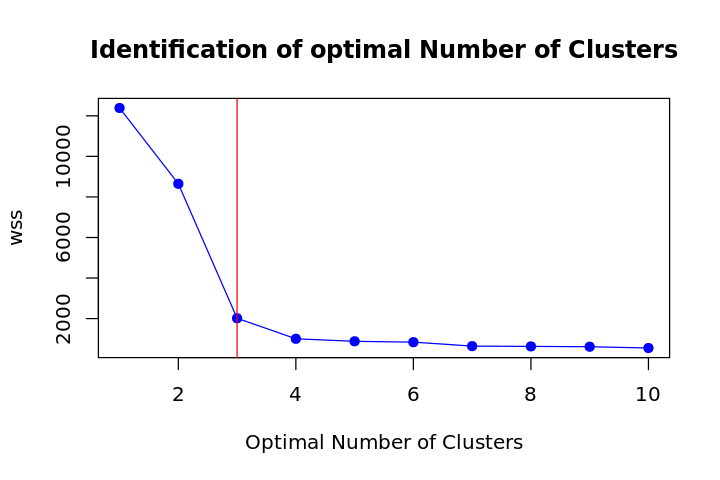

In [10]:
# calculate the pre-process parameters from the dataset
preprocessParams = preProcess(uniqueFeatures.1, method=c("range"))
# summarize transform parameters
print(preprocessParams)
# transform the dataset using the parameters
mydata = predict(preprocessParams, uniqueFeatures.1)

set.seed(1)
wss = (nrow(mydata) - 1) * sum(apply(mydata, 2, var))
for (j in 2:10) {
  set.seed(999)
  wss[j] = sum(kmeans(mydata,centers=j)$withinss)
}
plot(wss, 
     main="Identification of optimal Number of Clusters", 
     xlab="Optimal Number of Clusters",
     type="o",
     pch=19,
     col="blue") 
abline(v=3, col= "red")

#### Gaussian Mixture Model Clustering

Now we can fit GMM model to test the results. In the below graph we see the change of machine state quite frequently. Is the state when the machine turns on and off? Not sure. Should ask an expert about this

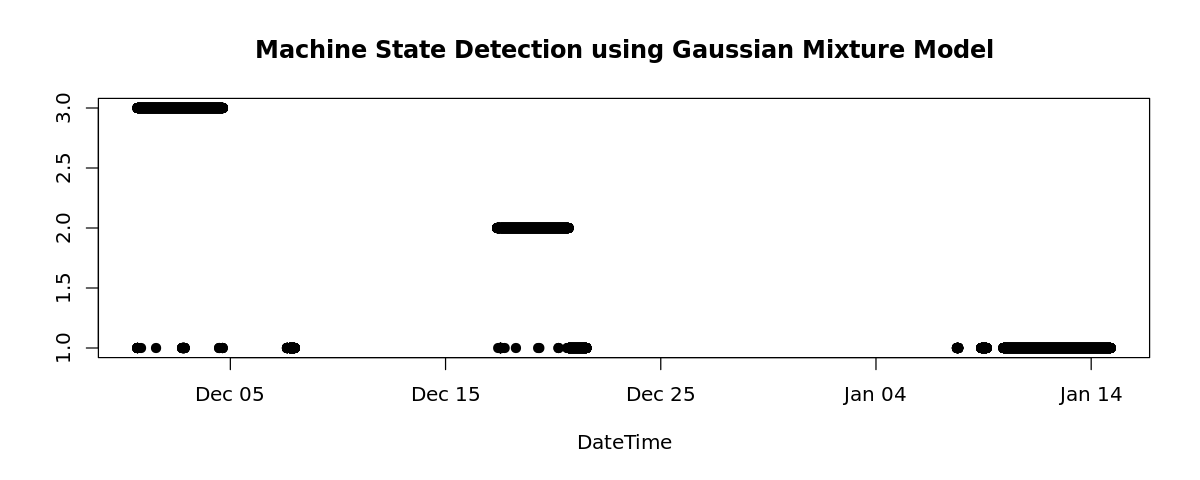

In [11]:
init = sample(1:nrow(mydata), size=1000)

m = densityMclust(mydata, 
                  3, 
                  verbose=F,
                  initialization=list(subset=init, set.seed(999))
                  )

#head(data$timeStamp)
#create dataframe with train and test results and date
GMM.result = data.frame(date =anytime(data$timeStamp), 
                        cluster = as.factor(m$classification),
                        occurance = 1
                        )

aggGMM.result = aggregate(GMM.result$occurance, 
                          list(GMM.result$date, GMM.result$cluster),
                          sum)
colnames(aggGMM.result) = c("date", "cluster", "occ")

GMM.result =aggGMM.result
#GMM.result = subset.data.frame(GMM.result, date >= Sys.Date()-1)
#write.table(GMM.result, "C:/Users/Gupta/Google Drive/sensehat 1/result.csv", sep=",", append=F, row.names=F)
options(repr.plot.width = 10, repr.plot.height = 4)
#plot the results
plot(
     GMM.result$date, 
     GMM.result$cluster, 
     type="p", 
    # col=GMM.result$y,
     #col = c("red","blue","green"),
     ylab="",
     main="Machine State Detection using Gaussian Mixture Model",
     xlab="DateTime",
     pch=19
     #yaxt="n"
     #cex = ifelse(aggGMM.result$occ >100,aggGMM.result$occ/500,1)
     )

#tail(GMM.result,100)

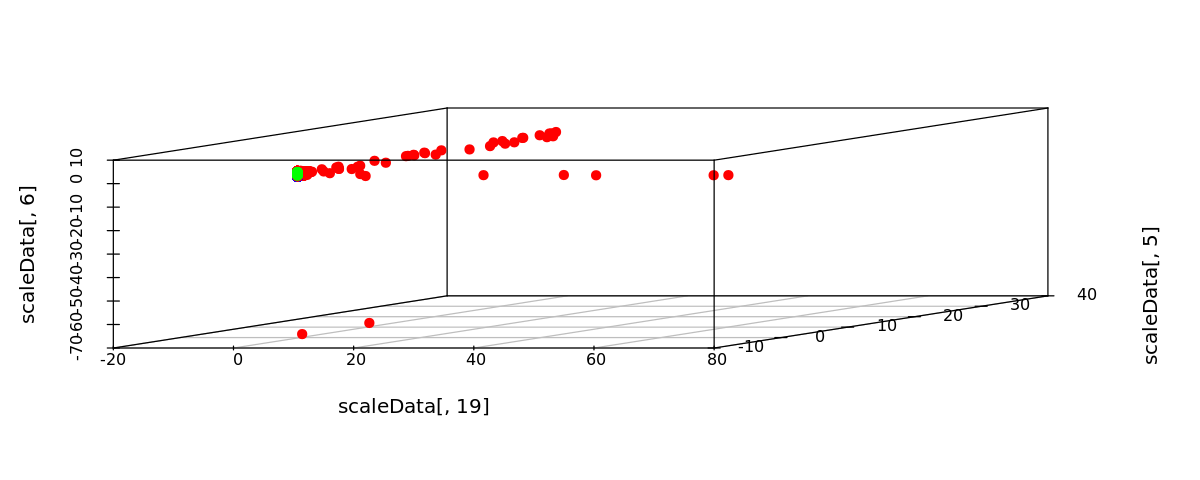

In [14]:
scaleData = scale(mydata)
#install.packages("scatterplot3d")
library(scatterplot3d)
scatterplot3d( scaleData[,19],scaleData[,5],  scaleData[,6]   ,
              color=c("red","green","blue") [m$classification], pch=19)